#### Qa Load and test the `libitmal` module
It's been chosen to use a path-expansion by code, as the group started work in a couple of different git repositories and they have to be collected later. This is thus the best solution, to find the script cwd, and go one directory up, in which the libitmal folder is located. As soon as this is in the path there is no problem importing the wanted modules. 

In [2]:
import sys,os  #https://docs.python.org/3/library/os.html
cwd = os.getcwd()
os.chdir(cwd)

#Since we use git in several different repositories, we've chosen to use the approach of expanding the path with the folder over wherever this script is. 
itmal_folder = os.path.dirname(cwd)
sys.path.append(os.path.expanduser(itmal_folder))
print(sys.path)

from libitmal import utils as itmalutils
print("\n Testing import from libitmal and in specific itmalutils")
itmalutils.TestAll()
itmalutils.isList([1,2])

['C:\\Users\\andre\\Google Drev\\Civil - Mekanik\\3. Semester\\ITMAL\\ITMAL_Personlig\\ITMAL_Personlig\\L01', 'C:\\Users\\andre\\Google Drev\\Civil - Mekanik\\3. Semester\\ITMAL\\ITMAL\\itmal', 'C:\\Users\\andre\\anaconda3\\python38.zip', 'C:\\Users\\andre\\anaconda3\\DLLs', 'C:\\Users\\andre\\anaconda3\\lib', 'C:\\Users\\andre\\anaconda3', '', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\andre\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\andre\\.ipython', 'C:\\Users\\andre\\Google Drev\\Civil - Mekanik\\3. Semester\\ITMAL\\ITMAL_Personlig\\ITMAL_Personlig', 'C:\\Users\\andre\\Google Drev\\Civil - Mekanik\\3. Semester\\ITMAL\\ITMAL_Personlig\\ITMAL_Personlig']

 Testing import from libitmal and in specific itmalutils
TestPrintMatrix...(no regression testing)
X=[[   1.

True

#### Qb Create your own module, with some functions, and test it

Now create your own module, with some dummy functionality. Load it and run you dummy function in a Jupyter Notebook.

Keep this module at hand, when coding, and try to capture reusable python functions in it as you invent them!

For the journal: remember to document your particular library setup (where did you place files, etc).

It's chosen to implement a simple plotter in xy-plane, named cxyplot, c is for custom. The file is located in libitmal. 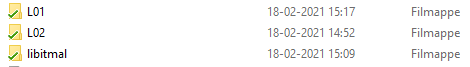, and this script is located in L01 as seen in the image

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'cxyplot', 'plt']


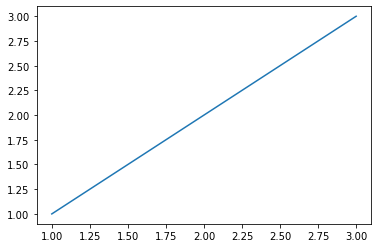

In [4]:
#Can be called without further path expansion as it's already present in the path. 
from libitmal import plotting as cplot

cplot.cxyplot([1,2,3], [1,2,3])




#### Qc How do you 'recompile' a module?

When changing the module code, Jupyter will keep running on the old module. How do you force the Jupyter notebook to re-load the module changes? 

Python can be forced to reload it if you restart the kernel. This is not very nice as you'll lose your data. This can also be done using the reload() function, on display below, which is imported from the library importlib, native to Python. 

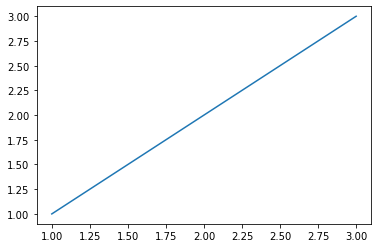

In [5]:
from importlib import reload #Import of reload()
reload(cplot) #Reloading cplot
 
cplot.cxyplot([1,2,3], [1,2,3])


#### Qe Extend the class with some public and private functions and member variables, and explain/demonstrate the meaning of the `self` 
Private functions and members are defined using a ´__´ which is illustrated in the lines below. Since they're private they cannot be accessed from the outside, althoug by use of name_mangling they can be reached which is also illustrated below. Here starting with the standard function as above, to show what beomes when you usually call public functions and members. 
https://www.tutorialsteacher.com/python/public-private-protected-modifiers

In [15]:
class MyClass:
    myvar = "blah"
    
    def myfun(self):
        print("This is a message inside the class.")
        
    
    
myobjectx = MyClass()
myobjectx.myfun()
myobjectx.myvar


This is a message inside the class.


'blah'

Now we make both the `myvar` and the `myfun` into their private counterparts, and try to call them as we did their public cousins.

In [22]:
class MyClass:
    __myprivatevar = "blah"
    
    def __myprivatefun(self):
        print("This is a message inside the class.")
        
    
    
myobjectx = MyClass()
myobjectx.__myprivatefun()
myobjectx.__myprivatevar

AttributeError: 'MyClass' object has no attribute '__myprivatefun'

We get AttributeErrors which indicates that this is not accessible to us from the outside. By use of name_mangling we can reach them however by prefixing `_MyClass` to the calls. This is not adviseble to do in general, but we assume it can get you out of some sort of trouble. 

In [23]:
class MyClass:
    __myprivatevar = "blah"
    
    def __myprivatefun(self):
        print("This is a message inside the class.")
        
    
    
myobjectx = MyClass()
myobjectx._MyClass__myprivatefun()
myobjectx._MyClass__myprivatevar

This is a message inside the class.


'blah'

So what even is private these days? 
Now to investigate the meaning of the self inside the class functions, we create two classes with one having `myfun(self)` and the other not, and trying to call them. 

In [24]:
class MyClass:
    myvar = "blah"

    def myfun(self):
        print("This is a message inside the class.")

myobjectx = MyClass()
myobjectx.myfun()

This is a message inside the class.


In [25]:
# TODO: Qe...
class MyClass:
    myvar = "blah"

    def myfun():
        print("This is a message inside the class.")

myobjectx = MyClass()
myobjectx.myfun()

TypeError: myfun() takes 0 positional arguments but 1 was given

The meaning of the self is to reference to the current instance of the class, i.e. accessing the specific instance of the class' variables f.x. 
If the self is not present in the function, it cannot be called from the specific instance of the object, as it is not contained in it "self" from the objects POV. So we see that the myfun() is giving error that no arguments are needed but it's given one, the self. Thus it fails because the object tries to call upon it's internal function, but it cant as the function doesn't formally know it's there. 

#### Qf Extend the class with a Constructor

Figure a way to declare/define a constructor (CTOR) in a python class. How is it done in python?

Is there a class destructor in python (DTOR)? Give a textual reason why/why-not python has a DTOR?

Hint: python is garbage collection like in C#, and do not go into the details of `__del__, ___enter__, __exit__` functions...unless you find it irresistible to investigate.

#### Qf Extend the class with a Constructor and Destructor, and explain how it's done and why they're there
In Python both a constructor and a destructor are present. The constructor is defined as `def __init__(self,name):` here taking the variable name, as seen below as well. So it creates the object with the variables in that particular instance of the class. https://www.geeksforgeeks.org/constructors-in-python/

In [27]:
# TODO: Qf...
#There is a class constructur. It's as follows: 
class MyClass:
    def __init__(self,name):
        self.name = name
    myvar = "blah"

    def myfun(self):
        print("This is a message inside the class:" + self.name)

myobjectx = MyClass("Herp")
myobjectx.myfun()

del myobjectx

myobjectx.myfun()

This is a message inside the class:Herp


NameError: name 'myobjectx' is not defined

The Destructer is assumed in python, even if not defined. Anyways, it's on the form: ` def __del__(self):` 
It can be called by `del obj`. As seen above it fails at line 16 as the objects doesn't exist anymore.

#### Qg Extend the class with a to-string function
The to-string function can be achieved in a number of ways, but one is to use the pickle module. Implementing it below, calling it, and unserialising it again afterwards, shows that the object is effectively serialised and unserialised. https://docs.python.org/3/library/pickle.html

In [32]:
import pickle

class MyClass:
    def __init__(self,name):
        self.name = name
    myvar = "blah"

    def myfun(self):
        print("This is a message inside the class:" + self.name)
        
    def tostring(self):
        pickle.dumps(self)
        return serialised

myobjectx = MyClass("Herp")
serialised = myobjectx.tostring() #For serialization
print("\n Serialised!")
print(serialised)
print("\n Unserialised!")
unserialised = pickle.loads(serialised)
print(unserialised)


 Serialised!
b'\x80\x04\x95-\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x07MyClass\x94\x93\x94)\x81\x94}\x94\x8c\x04name\x94\x8c\x04Herp\x94sb.'

 Unserialised!
